## MODELING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, average_precision_score 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve


sns.set(color_codes = True)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [2]:
df_household_demo= pd.read_csv('DATA_CLEAN/households_beforeCamp18.csv')

# # df_household_demo= pd.read_csv('DATA_CLEAN/household_cluster_old.csv')

# # df_household_demo= pd.read_csv('retail_data2/household_cluster.csv')

# df_household_demo= pd.read_csv('retail_data2/households_beforeCamp18.csv')



In [3]:
df_household_demo.shape

print(df_household_demo[df_household_demo.campA_18_converted==1].shape[0])

df_household_demo.sort_values('household_key')



166


,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,segment
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,Low-value
111,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,10,38,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Low-value
463,8,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,0,90,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,4,Mid-value
711,13,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,0,207,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,6,Mid-value
1,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,Low-value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2494,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,14,26,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Low-value
110,2496,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05,3610.50,7,53,1453.34,67.71,215.74,304.01,305.72,7.79,0.00,968.75,45-54,A,75-99K,Homeowner,Unknown,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,Low-value
634,2497,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,5619.49,3,183,3355.06,208.50,610.40,0.00,456.01,0.00,3.94,582.62,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,5,Mid-value
409,2498,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00,2119.21,1,130,1435.60,33.63,66.62,0.00,217.29,35.40,9.53,20.44,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,3,1,0,4,Mid-value


In [4]:
# get all numerical columns
numerical_dtypes = ['int16','int32', 'int64','float16','float32','float64']
num_cols = []
for i in df_household_demo.columns:
    if df_household_demo[i].dtype in numerical_dtypes:
        num_cols.append(i)
        
print(len(num_cols))
print(num_cols)

cat_cols = df_household_demo.columns.difference(num_cols)
print(len(cat_cols))
print(cat_cols)

57
['household_key', 'received_campaign', 'redeemed_coupons', 'total_campaigns_received', 'TypeA', 'TypeB', 'TypeC', 'total_campaigns_engaged', 'total_coupons_received', 'total_coupons_redeemed', 'camp_conversion_rate', 'coupon_conversion_rate', 'revenue', 'recency', 'frequency', 'GROCERY_spend', 'DELI_spend', 'PRODUCE_spend', 'KIOSK-GAS_spend', 'DRUG GM_spend', 'NUTRITION_spend', 'SALAD BAR_spend', 'MEAT_spend', 'campA_26_converted', 'campA_30_converted', 'campA_8_converted', 'campA_13_converted', 'campA_18_converted', 'campB_28_converted', 'campB_29_converted', 'campB_1_converted', 'campB_2_converted', 'campB_4_converted', 'campB_5_converted', 'campB_7_converted', 'campB_9_converted', 'campB_10_converted', 'campB_12_converted', 'campB_11_converted', 'campB_16_converted', 'campB_17_converted', 'campB_19_converted', 'campB_22_converted', 'campB_21_converted', 'campB_23_converted', 'campB_25_converted', 'campB_24_converted', 'campC_27_converted', 'campC_3_converted', 'campC_6_converted'

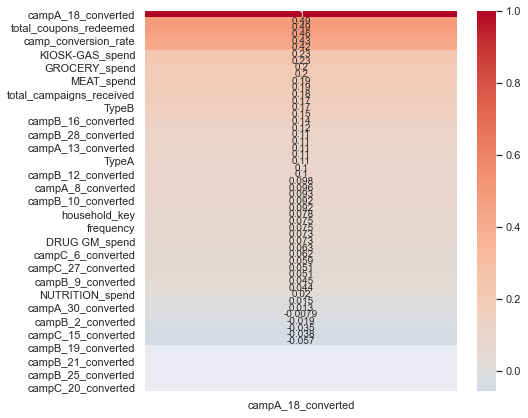

In [5]:
figure = plt.figure(figsize=(7,7))
sns.heatmap(df_household_demo.corr()[['campA_18_converted']].sort_values('campA_18_converted',ascending=False),annot=True, cmap='coolwarm', center=0);


In [6]:
df_household_demo_encoded = pd.get_dummies(data = df_household_demo, columns = cat_cols)
df_household_demo_encoded.head()

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,age_desc_19-24,age_desc_25-34,age_desc_35-44,age_desc_45-54,age_desc_55-64,age_desc_65+,hh_comp_desc_1 Adult Kids,hh_comp_desc_2 Adults Kids,hh_comp_desc_2 Adults No Kids,hh_comp_desc_Single Female,hh_comp_desc_Single Male,hh_comp_desc_Unknown,homeowner_desc_Homeowner,homeowner_desc_Probable Owner,homeowner_desc_Probable Renter,homeowner_desc_Renter,homeowner_desc_Unknown,household_size_desc_1,household_size_desc_2,household_size_desc_3,household_size_desc_4,household_size_desc_5+,income_desc_100-124K,income_desc_125-149K,income_desc_15-24K,income_desc_150-174K,income_desc_175-199K,income_desc_200-249K,income_desc_25-34K,income_desc_250K+,income_desc_35-49K,income_desc_50-74K,income_desc_75-99K,income_desc_Under 15K,kid_category_desc_1,kid_category_desc_2,kid_category_desc_3+,kid_category_desc_None/Unknown,marital_status_code_A,marital_status_code_B,marital_status_code_U,segment_High-value,segment_Low-value,segment_Mid-value
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
1,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
2,25,1,0,3.0,3.0,0.0,0.0,0.0,48.0,0.0,0.00,0.00,2739.20,6,76,1271.37,37.72,103.08,35.00,921.90,1.00,10.29,110.97,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
3,71,1,0,1.0,1.0,0.0,0.0,0.0,16.0,0.0,0.00,0.00,2991.04,6,76,805.14,23.20,128.71,30.00,1568.06,1.00,26.72,182.04,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
4,114,1,0,3.0,3.0,0.0,0.0,0.0,48.0,0.0,0.00,0.00,2580.29,7,72,1400.94,8.52,74.80,135.28,342.83,111.69,2.55,87.42,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0


In [84]:
# not_included = ['campA_18_converted','total_campaigns_received','TypeA','TypeB','TypeC','household_key','received_campaign','redeemed_coupons','total_campaigns_engaged','total_coupons_received','total_coupons_redeemed','camp_conversion_rate','coupon_conversion_rate','camp_converted']

# cols = [c for c in df_household_demo_encoded.columns if c not in (not_included)]

cols = [
 'segment_High-value',
#  'segment_Low-value',
 'segment_Mid-value',
 'age_desc_19-24',
 'age_desc_25-34',
 'age_desc_35-44',
 'age_desc_45-54',
 'age_desc_55-64',
 'age_desc_65+',
 'hh_comp_desc_1 Adult Kids',
 'hh_comp_desc_2 Adults Kids',
 'hh_comp_desc_2 Adults No Kids',
 'hh_comp_desc_Single Female',
 'hh_comp_desc_Single Male',
#  'hh_comp_desc_Unknown',
 'homeowner_desc_Homeowner',
 'homeowner_desc_Probable Owner',
 'homeowner_desc_Probable Renter',
 'homeowner_desc_Renter',
#  'homeowner_desc_Unknown',
 'household_size_desc_1',
 'household_size_desc_2',
 'household_size_desc_3',
 'household_size_desc_4',
 'household_size_desc_5+',
 'income_desc_100-124K',
 'income_desc_125-149K',
 'income_desc_15-24K',
 'income_desc_150-174K',
 'income_desc_175-199K',
 'income_desc_200-249K',
 'income_desc_25-34K',
 'income_desc_250K+',
 'income_desc_35-49K',
 'income_desc_50-74K',
 'income_desc_75-99K',
 'income_desc_Under 15K',
 'kid_category_desc_1',
 'kid_category_desc_2',
 'kid_category_desc_3+',
#  'kid_category_desc_None/Unknown',
 'marital_status_code_A',
 'marital_status_code_B',
 'marital_status_code_U']

# cols=['recency', 'frequency']

X = pd.DataFrame(df_household_demo_encoded, columns = cols)
y = df_household_demo_encoded['campA_18_converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
cols
# X_train.head()

['segment_High-value',
 'segment_Mid-value',
 'age_desc_19-24',
 'age_desc_25-34',
 'age_desc_35-44',
 'age_desc_45-54',
 'age_desc_55-64',
 'age_desc_65+',
 'hh_comp_desc_1 Adult Kids',
 'hh_comp_desc_2 Adults Kids',
 'hh_comp_desc_2 Adults No Kids',
 'hh_comp_desc_Single Female',
 'hh_comp_desc_Single Male',
 'homeowner_desc_Homeowner',
 'homeowner_desc_Probable Owner',
 'homeowner_desc_Probable Renter',
 'homeowner_desc_Renter',
 'household_size_desc_1',
 'household_size_desc_2',
 'household_size_desc_3',
 'household_size_desc_4',
 'household_size_desc_5+',
 'income_desc_100-124K',
 'income_desc_125-149K',
 'income_desc_15-24K',
 'income_desc_150-174K',
 'income_desc_175-199K',
 'income_desc_200-249K',
 'income_desc_25-34K',
 'income_desc_250K+',
 'income_desc_35-49K',
 'income_desc_50-74K',
 'income_desc_75-99K',
 'income_desc_Under 15K',
 'kid_category_desc_1',
 'kid_category_desc_2',
 'kid_category_desc_3+',
 'marital_status_code_A',
 'marital_status_code_B',
 'marital_status_cod

In [8]:
X.head()

,age_desc_19-24,age_desc_25-34,age_desc_35-44,age_desc_45-54,age_desc_55-64,age_desc_65+,hh_comp_desc_1 Adult Kids,hh_comp_desc_2 Adults Kids,hh_comp_desc_2 Adults No Kids,hh_comp_desc_Single Female,hh_comp_desc_Single Male,hh_comp_desc_Unknown,household_size_desc_1,household_size_desc_2,household_size_desc_3,household_size_desc_4,household_size_desc_5+,income_desc_100-124K,income_desc_125-149K,income_desc_15-24K,income_desc_150-174K,income_desc_175-199K,income_desc_200-249K,income_desc_25-34K,income_desc_250K+,income_desc_35-49K,income_desc_50-74K,income_desc_75-99K,income_desc_Under 15K,kid_category_desc_1,kid_category_desc_2,kid_category_desc_3+,kid_category_desc_None/Unknown,marital_status_code_A,marital_status_code_B,marital_status_code_U
0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [9]:
df_household_demo_encoded[df_household_demo_encoded.campA_18_converted==1]

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,age_desc_19-24,age_desc_25-34,age_desc_35-44,age_desc_45-54,age_desc_55-64,age_desc_65+,hh_comp_desc_1 Adult Kids,hh_comp_desc_2 Adults Kids,hh_comp_desc_2 Adults No Kids,hh_comp_desc_Single Female,hh_comp_desc_Single Male,hh_comp_desc_Unknown,homeowner_desc_Homeowner,homeowner_desc_Probable Owner,homeowner_desc_Probable Renter,homeowner_desc_Renter,homeowner_desc_Unknown,household_size_desc_1,household_size_desc_2,household_size_desc_3,household_size_desc_4,household_size_desc_5+,income_desc_100-124K,income_desc_125-149K,income_desc_15-24K,income_desc_150-174K,income_desc_175-199K,income_desc_200-249K,income_desc_25-34K,income_desc_250K+,income_desc_35-49K,income_desc_50-74K,income_desc_75-99K,income_desc_Under 15K,kid_category_desc_1,kid_category_desc_2,kid_category_desc_3+,kid_category_desc_None/Unknown,marital_status_code_A,marital_status_code_B,marital_status_code_U,segment_High-value,segment_Low-value,segment_Mid-value
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
7,164,1,0,2.0,1.0,1.0,0.0,0.0,35.0,0.0,0.00,0.00,3172.01,4,84,2077.29,39.09,119.90,148.00,261.44,1.00,4.02,109.30,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
8,192,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,3143.28,7,74,2166.07,0.00,194.50,0.00,260.81,2.49,0.00,283.94,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
9,208,1,1,6.0,4.0,2.0,0.0,1.0,116.0,1.0,0.17,0.01,3443.07,8,109,1672.20,111.88,236.34,405.58,254.49,0.00,0.00,559.33,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
21,438,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2703.57,7,46,1432.63,5.18,301.73,0.00,309.33,3.50,0.00,330.79,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1609,1,0,2.0,1.0,1.0,0.0,0.0,29.0,0.0,0.00,0.00,22745.40,0,332,10094.86,1105.24,2059.47,837.82,2920.21,117.33,24.45,268.25,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,3,8,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
794,1653,1,0,5.0,2.0,2.0,1.0,0.0,92.0,0.0,0.00,0.00,14781.9

In [85]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Oversampling the data
smote = SMOTE(random_state = 101)
X_sm, y_sm = smote.fit_resample(X, y)


X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,test_size=0.2,random_state=42)
Counter(y_sm)

Counter({1: 635, 0: 635})

In [86]:
ss = StandardScaler()
Xs = ss.fit_transform(X_sm)

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,y_sm,test_size=0.2,random_state=42)


In [90]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve

def plot_ROC_curve(model,X_test,y_test):

    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = model.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

def display_scores(model, X_test, y_test, y_pred):
    
    # predict probabilities
    pred_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    pred_probs = pred_probs[:, 1]
    
    print('Accuracy is: ',round(accuracy_score(y_test, y_pred),2))
    print('F1 score is: ',round(f1_score(y_test, y_pred),2))
    print('Ave PR score: ',round(average_precision_score(y_test, pred_probs),2))

    cm = confusion_matrix(y_test,y_pred)
    
    sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
#     print(classification_report(y_test,y_pred,target_names=('Stay','Leave')))
    print(classification_report(y_test,y_pred))
    
    plot_precision_recall_curve(model, X_test, y_test)
    
    plot_ROC_curve(model,X_test,y_test)

Accuracy is:  0.87
F1 score is:  0.85
Ave PR score:  0.91
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       138
           1       0.92      0.78      0.85       116

    accuracy                           0.87       254
   macro avg       0.88      0.86      0.87       254
weighted avg       0.88      0.87      0.87       254



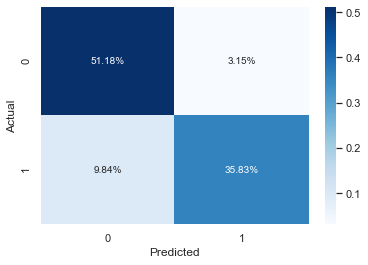

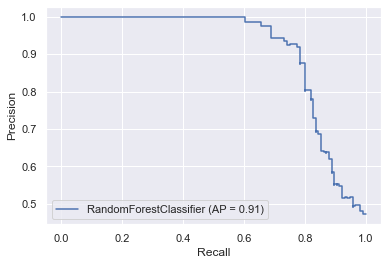

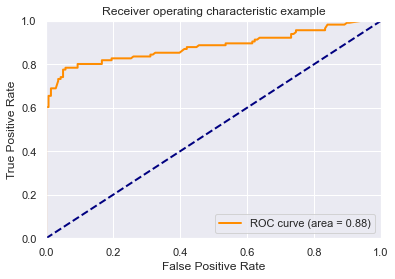

In [93]:
RF_clf = RandomForestClassifier()
    
RF_clf.fit(Xs_train,ys_train)
y_pred = RF_clf.predict(Xs_test)
display_scores(RF_clf, Xs_test, ys_test, y_pred)

Accuracy is:  0.83
F1 score is:  0.8
Ave PR score:  0.9
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       138
           1       0.84      0.77      0.80       116

    accuracy                           0.83       254
   macro avg       0.83      0.82      0.82       254
weighted avg       0.83      0.83      0.83       254



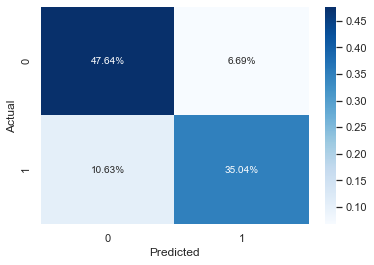

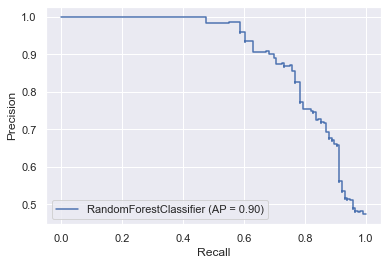

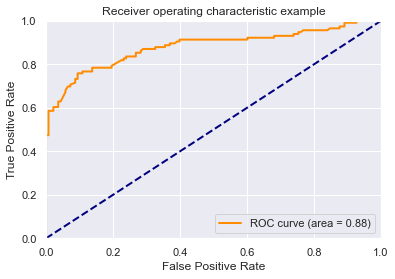

In [86]:
RF_clf = RandomForestClassifier(max_depth=30,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=1200)
    
RF_clf.fit(X_train_sm,y_train_sm)
y_pred_sm = RF_clf.predict(X_test_sm)
display_scores(RF_clf, X_test_sm, y_test_sm, y_pred_sm)


                     feature     score
31        income_desc_50-74K  0.104432
1          segment_Mid-value  0.100193
37     marital_status_code_A  0.079383
5             age_desc_45-54  0.075530
30        income_desc_35-49K  0.067052
13  homeowner_desc_Homeowner  0.052794
4             age_desc_35-44  0.043545
0         segment_High-value  0.037380
39     marital_status_code_U  0.033911
32        income_desc_75-99K  0.033526


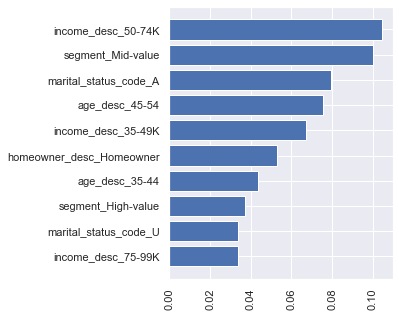

In [95]:
per_imp = permutation_importance(RF_clf, Xs_train,ys_train, scoring='recall')
importances = per_imp.importances_mean
    
imp_dict = dict(zip(X.columns, importances))
score_df = pd.DataFrame(imp_dict.items(), columns=['feature', 'score'])
score_df = score_df.sort_values('score',ascending=False)
print(score_df.head(10))

# plot the scores
fig = plt.figure(figsize=(4,5))
score_df = score_df.sort_values('score',ascending=False).head(10).sort_values('score',ascending=True)
plt.barh(score_df.feature, score_df.score)
plt.xticks(rotation=90)
plt.show()


In [75]:
def cross_val_models(X_train, X_test, y_train, y_test,imbalancedData=False,hyperTune=False):
    
    if not hyperTune:
        if imbalancedData:
            # models with hyperparams for imbalanced dataset
            models = [
                      ('LogReg', LogisticRegression(solver='liblinear')), 
                      ('RF', RandomForestClassifier(class_weight='balanced')),
                      ('GB', GradientBoostingClassifier()),
                      ('XGB', xgb.XGBClassifier(scale_pos_weight=5.2)),
                      ('KNN', KNeighborsClassifier()),
                      ('NB', GaussianNB())
                     ] 
        else:
             models = [
                      ('LogReg', LogisticRegression()), 
                      ('RF', RandomForestClassifier()),
                      ('GB', GradientBoostingClassifier()),
                      ('XGB', xgb.XGBClassifier()),
                      ('KNN', KNeighborsClassifier()),
                      ('NB', GaussianNB())
                     ] 
            
    else: 
        XGB_clf = xgb.XGBClassifier(colsample_bytree=0.6,
                                     gamma=1,
                                     learning_rate= 0.1,
                                     max_depth=12,
                                     min_child_weight=1,
                                     n_estimators=200,
                                     subsample=1.0)

        RF_clf = RandomForestClassifier(max_depth=25,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=1200)

        GB_clf = GradientBoostingClassifier(random_state=42, 
                                            learning_rate=1, 
                                            max_depth=9, 
                                            n_estimators=50)
        
        log_model = LogisticRegression(solver='newton-cg',
                                       C=1.0,
                                       penalty='l2')
        
        models = [
                  ('LogReg', log_model), 
                  ('RF', RF_clf),
                  ('GB', GB_clf),
                  ('XGB', XGB_clf)
                ] 
            
    
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'average_precision','roc_auc']
    train_score_dfs = []
    test_score_dfs = []
    test_score_dict = {}
    target_names = ['No Churn', 'Churn']
    for name, model in models:
        
        # GET TRAIN SCORES
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        df1 = pd.DataFrame(cv_results)
        df1['model'] = name
        train_score_dfs.append(df1)
    
        # GET TEST SCORES
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # print(name)
        # print(classification_report(y_test, y_pred, target_names=target_names))
        
        # predict probabilities
        pred_probs = model.predict_proba(X_test)
        # keep probabilities for the positive class only
        pred_probs = pred_probs[:, 1]
        
        test_score_dict = {'Accuracy': round(accuracy_score(y_test, y_pred),2),
                           'Precision': round(precision_score(y_test, y_pred),2),
                           'Recall': round(recall_score(y_test, y_pred),2),
                           'F1': round(f1_score(y_test, y_pred),2),
                           'Average PC': round(average_precision_score(y_test, pred_probs),2),
                           'ROC_AUC': round(roc_auc_score(y_test, y_pred),2)
                          }
        
        df2 = pd.DataFrame.from_dict(test_score_dict, orient='index').transpose()
        df2['Model'] = name
        test_score_dfs.append(df2)
    
    # combine all score sets into final df
    final_train_scores = pd.concat(train_score_dfs, ignore_index=True)
    final_test_scores = pd.concat(test_score_dfs, ignore_index=True)
    
    return final_train_scores, final_test_scores

In [37]:
ss = StandardScaler()
Xs_sm = ss.fit_transform(X_sm)
Xs_train_sm, Xs_test_sm, ys_train_sm, ys_test_sm = train_test_split(Xs_sm,y_sm,test_size=0.2,random_state=42)


In [76]:
cv_scores4, test_scores4 = cross_val_models(Xs_train_sm, Xs_test_sm, ys_train_sm, ys_test_sm,imbalancedData=False) 

/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
cv_scores4.groupby('model').mean().sort_values(['test_accuracy','test_f1','test_average_precision'],ascending=False)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_average_precision,test_roc_auc
model,,,,,,,,
RF,0.250650,0.033140,0.801198,0.825087,0.772730,0.797143,0.874206,0.859399
NB,0.001510,0.006403,0.799203,0.993651,0.610592,0.756218,0.849659,0.768820
GB,0.158344,0.006691,0.797233,0.911911,0.671732,0.771651,0.902951,0.869027
XGB,0.218643,0.015411,0.796233,0.808258,0.786120,0.796429,0.898226,0.875791
LogReg,0.038421,0.007998,0.788380,1.000000,0.585099,0.737967,0.888703,0.841371
KNN,0.003298,0.040979,0.759857,0.835148,0.659305,0.735568,0.826738,0.824823


In [91]:
cv_scores4.groupby('model').mean().sort_values(['test_accuracy'],ascending=False)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_average_precision,test_roc_auc
model,,,,,,,,
RF,0.250650,0.033140,0.801198,0.825087,0.772730,0.797143,0.874206,0.859399
NB,0.001510,0.006403,0.799203,0.993651,0.610592,0.756218,0.849659,0.768820
GB,0.158344,0.006691,0.797233,0.911911,0.671732,0.771651,0.902951,0.869027
XGB,0.218643,0.015411,0.796233,0.808258,0.786120,0.796429,0.898226,0.875791
LogReg,0.038421,0.007998,0.788380,1.000000,0.585099,0.737967,0.888703,0.841371
KNN,0.003298,0.040979,0.759857,0.835148,0.659305,0.735568,0.826738,0.824823


In [93]:
cv_scores4.groupby('model').std().sort_values(['test_accuracy'],ascending=True)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_average_precision,test_roc_auc
model,,,,,,,,
RF,0.015466,0.000904,0.010928,0.042517,0.035440,0.025370,0.028428,0.008272
KNN,0.000634,0.007318,0.013314,0.049726,0.037600,0.025707,0.047701,0.027243
XGB,0.010445,0.001577,0.021349,0.049770,0.017509,0.027845,0.018976,0.016564
LogReg,0.024724,0.002775,0.023424,0.000000,0.026420,0.021169,0.021956,0.016433
NB,0.000059,0.000184,0.028461,0.014197,0.028460,0.025705,0.030149,0.026090
GB,0.011720,0.000259,0.029109,0.036159,0.051904,0.021018,0.010470,0.009442


In [78]:
test_scores4.sort_values(['ROC_AUC','Recall'],ascending=False)

,Accuracy,Precision,Recall,F1,Average PC,ROC_AUC,Model
1,0.83,0.83,0.78,0.80,0.88,0.82,RF
3,0.83,0.83,0.78,0.80,0.92,0.82,XGB
2,0.83,0.91,0.71,0.80,0.90,0.82,GB
5,0.83,1.00,0.64,0.78,0.86,0.82,NB
0,0.82,1.00,0.61,0.76,0.88,0.81,LogReg
4,0.81,0.88,0.68,0.77,0.83,0.80,KNN


In [82]:
cv_scores6, test_scores6 = cross_val_models(Xs_train_sm, Xs_test_sm, ys_train_sm, ys_test_sm,imbalancedData=False,hyperTune=True)


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [83]:
cv_scores6.groupby('model').mean().sort_values(['test_accuracy','test_f1','test_average_precision'],ascending=False)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_average_precision,test_roc_auc
model,,,,,,,,
XGB,0.616100,0.011983,0.801169,0.842193,0.749957,0.792740,0.906158,0.879146
RF,3.417108,0.421261,0.798237,0.841406,0.746390,0.788790,0.899860,0.871763
LogReg,0.032780,0.008984,0.788380,1.000000,0.585099,0.737967,0.888722,0.841391
GB,0.313299,0.007312,0.781493,0.808281,0.755144,0.777837,0.871064,0.847461


In [84]:
test_scores6.sort_values(['ROC_AUC','Recall'],ascending=False)

,Accuracy,Precision,Recall,F1,Average PC,ROC_AUC,Model
3,0.84,0.87,0.78,0.82,0.92,0.84,XGB
1,0.84,0.86,0.77,0.81,0.91,0.83,RF
0,0.82,1.00,0.61,0.76,0.88,0.81,LogReg
2,0.80,0.79,0.78,0.78,0.90,0.80,GB


In [85]:
# TUNING RANDOMFOREST 

param_grid = {
    'max_depth': [5, 8, 15, 25, 30],
    'min_samples_leaf': [1, 2, 5, 10] ,
    'min_samples_split': [2, 5, 10, 15, 100],
    'n_estimators': [100, 300, 500, 800, 1200]
}

# Create a based model
RF = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid,cv = 5, n_jobs = -1, verbose = 1, scoring='recall')
grid_search.fit(Xs_train_sm,ys_train_sm)
grid_search.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 34.4min finished


{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [24]:
Xs_train

array([[-7.66362097e-02, -1.51447576e-01, -1.46046955e-01, ...,
        -7.05106595e-03, -1.32930480e-01, -1.29427480e-01],
       [-7.66362097e-02, -1.51447576e-01, -1.06150282e-01, ...,
        -1.11177272e-01, -1.32930480e-01, -7.20747586e-02],
       [-7.66362097e-02, -1.51447576e-01, -1.46046955e-01, ...,
        -7.05106595e-03, -1.32930480e-01, -1.29427480e-01],
       ...,
       [-7.66362097e-02, -1.51447576e-01, -1.06150282e-01, ...,
        -1.11177272e-01, -1.32930480e-01, -7.20747586e-02],
       [-7.66362097e-02, -1.10305667e-01, -1.46046955e-01, ...,
        -1.11177272e-01, -9.03954059e-02, -1.29427480e-01],
       [-7.66362097e-02, -1.51447576e-01, -1.46046955e-01, ...,
        -1.11177272e-01, -1.32930480e-01,  7.15436814e+00]])

### TESTING ON Adaboost, Stacking and Bagging classifiers

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

np.random.seed(0)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)

num_est = [1, 2, 3, 10, 40]
label = ['AdaBoost (n_est=%d)' % i for i in num_est]

for n_est, label in zip(num_est, label):     
    boosting = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)   
    boosting.fit(Xs_train_sm, ys_train_sm)

    scores = cross_val_score(boosting, Xs_train_sm, ys_train_sm, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))


Accuracy: 0.53 (+/- 0.00) [AdaBoost (n_est=1)]
Accuracy: 0.55 (+/- 0.01) [AdaBoost (n_est=2)]
Accuracy: 0.58 (+/- 0.01) [AdaBoost (n_est=3)]
Accuracy: 0.67 (+/- 0.00) [AdaBoost (n_est=10)]
Accuracy: 0.79 (+/- 0.01) [AdaBoost (n_est=40)]


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

np.random.seed(0)
clf1 = KNeighborsClassifier(n_neighbors = 1)
# clf2 = RandomForestClassifier(n_estimators = 10, random_state = 1)
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
lr = LogisticRegression(multi_class='auto',solver='lbfgs') 
sclf = StackingClassifier(classifiers = [clf1,clf2,clf3],
                            meta_classifier = lr)   



In [61]:
label = ['K-NN', 'Random Forest', 'Naïve Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    

clf_cv_mean = []
clf_cv_std = []
for clf, label in zip(clf_list, label):
        
    scores = cross_val_score(clf, Xs_train_sm, ys_train_sm, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(Xs_train_sm, ys_train_sm)


Accuracy: 0.74 (+/- 0.02) [K-NN]
Accuracy: 0.79 (+/- 0.01) [Random Forest]
Accuracy: 0.80 (+/- 0.01) [Naïve Bayes]
Accuracy: 0.80 (+/- 0.01) [Stacking Classifier]


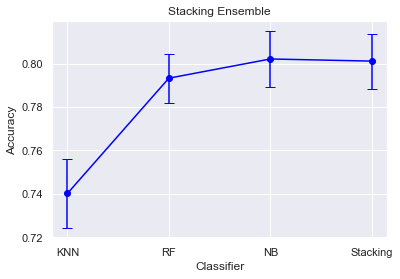

In [62]:
# plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(
    range(4),
    clf_cv_mean,
    yerr = clf_cv_std,
    c = 'blue',
    fmt = '-o',
    capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                

plt.title('Stacking Ensemble')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])     
plt.show()

In [97]:
np.random.seed(0)
clf1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
clf2 = KNeighborsClassifier(n_neighbors = 1)    

from sklearn.ensemble import BaggingClassifier

bagging1 = BaggingClassifier(
    base_estimator = clf1,
    n_estimators = 10,
    max_samples = 0.8,
    max_features = 0.8)
bagging2 = BaggingClassifier(
    base_estimator = clf2,
    n_estimators = 10,
    max_samples = 0.8,
    max_features = 0.8)


label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

for clf, label in zip(clf_list, label):        
    scores = cross_val_score(clf, Xs_train,ys_train, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
        
    clf.fit(Xs_train,ys_train)


Accuracy: 0.55 (+/- 0.01) [Decision Tree]
Accuracy: 0.78 (+/- 0.02) [K-NN]
Accuracy: 0.67 (+/- 0.03) [Bagging Tree]
Accuracy: 0.80 (+/- 0.01) [Bagging K-NN]
